## Convolutional Neural Networks

#### Important Transformations

<img src = "Transformations.jpg">
<img src = "Transformations1.jpg">
<img src = "Transformations2.jpg">
<img src = "Transformations3.jpg">
<img src = "Transformations4.jpg">
<img src = "Transformations5.jpg">
<img src = "Transformations6.jpg">
<img src = "Transformations7.jpg">
<img src = "Transformations8.jpg">

#### Introduction to Convolutional Neural Networks

<img src = "Introduction to CNN.jpg">
<img src = "Introduction to CNN1.jpg">
<img src = "Introduction to CNN2.jpg">
<img src = "Introduction to CNN3.jpg">
<img src = "Introduction to CNN4.jpg">
<img src = "Introduction to CNN5.jpg">
<img src = "Introduction to CNN6.jpg">
<img src = "Introduction to CNN7.jpg">
<img src = "Introduction to CNN8.jpg">
<img src = "Introduction to CNN9.jpg">
<img src = "Introduction to CNN10.jpg">
<img src = "Introduction to CNN11.jpg">
<img src = "Introduction to CNN12.jpg">
<img src = "Introduction to CNN13.jpg">
<img src = "Introduction to CNN14.jpg">
<img src = "Introduction to CNN15.jpg">
<img src = "Introduction to CNN16.jpg">
<img src = "Introduction to CNN17.jpg">
<img src = "Introduction to CNN18.jpg">
<img src = "Introduction to CNN19.jpg">
<img src = "Introduction to CNN20.jpg">
<img src = "Introduction to CNN21.jpg">
<img src = "Introduction to CNN22.jpg">
<img src = "Introduction to CNN23.jpg">
<img src = "Introduction to CNN24.jpg">
<img src = "Introduction to CNN25.jpg">
<img src = "Introduction to CNN26.jpg">

# Machine Learning Foundation

## Course 5, Part e: CNN DEMO

## Building a CNN to classify images in the CIFAR-10 Dataset

We will work with the CIFAR-10 Dataset.  This is a well-known dataset for image classification, which consists of 60000 32x32 color images in 10 classes, with 6000 images per class. There are 50000 training images and 10000 test images.

The 10 classes are:

<ol start="0">
<li> airplane
<li>  automobile
<li> bird
<li>  cat
<li> deer
<li> dog
<li>  frog
<li>  horse
<li>  ship
<li>  truck
</ol>

For details about CIFAR-10 see:
https://www.cs.toronto.edu/~kriz/cifar.html

For a compilation of published performance results on CIFAR 10, see:
http://rodrigob.github.io/are_we_there_yet/build/classification_datasets_results.html

---

### Building Convolutional Neural Nets

In this exercise we will build and train our first convolutional neural networks.  In the first part, we walk through the different layers and how they are configured.  In the second part, you will build your own model, train it, and compare the performance.

In [19]:
import keras
import tensorflow
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import optimizers
import matplotlib.pyplot as plt

In [2]:
# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

170508288/170498071 [==============================] - 836s 5us/step
x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [3]:
## Each image is a 32 x 32 x 3 numpy array
x_train[444].shape

(32, 32, 3)

[9]


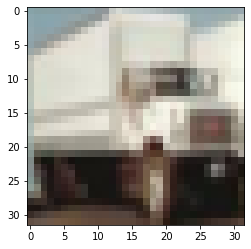

In [4]:
## Let's look at one of the images

print(y_train[444])
plt.imshow(x_train[444]);

In [6]:
num_classes = 10

y_train = keras.utils.np_utils.to_categorical(y_train, num_classes)
y_test = keras.utils.np_utils.to_categorical(y_test, num_classes)

In [7]:
# now instead of classes described by an integer between 0-9 we have a vector with a 1 in the (Pythonic) 9th position
y_train[444]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

In [8]:
# As before, let's make everything float and scale
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

## Keras Layers for CNNs
- Previously we built Neural Networks using primarily the Dense, Activation and Dropout Layers.

- Here we will describe how to use some of the CNN-specific layers provided by Keras

### Conv2D

```python
keras.layers.convolutional.Conv2D(filters, kernel_size, strides=(1, 1), padding='valid', data_format=None, dilation_rate=(1, 1), activation=None, use_bias=True, kernel_initializer='glorot_uniform', bias_initializer='zeros', kernel_regularizer=None, bias_regularizer=None, activity_regularizer=None, kernel_constraint=None, bias_constraint=None, **kwargs)
```

A few parameters explained:
- `filters`: the number of filter used per location.  In other words, the depth of the output.
- `kernel_size`: an (x,y) tuple giving the height and width of the kernel to be used
- `strides`: and (x,y) tuple giving the stride in each dimension.  Default is `(1,1)`
- `input_shape`: required only for the first layer

Note, the size of the output will be determined by the kernel_size, strides

### MaxPooling2D
`keras.layers.pooling.MaxPooling2D(pool_size=(2, 2), strides=None, padding='valid', data_format=None)`

- `pool_size`: the (x,y) size of the grid to be pooled.
- `strides`: Assumed to be the `pool_size` unless otherwise specified

### Flatten
Turns its input into a one-dimensional vector (per instance).  Usually used when transitioning between convolutional layers and fully connected layers.

---

## First CNN
Below we will build our first CNN.  For demonstration purposes (so that it will train quickly) it is not very deep and has relatively few parameters.  We use strides of 2 in the first two convolutional layers which quickly reduces the dimensions of the output.  After a MaxPooling layer, we flatten, and then have a single fully connected layer before our final classification layer.

In [9]:
# Let's build a CNN using Keras' Sequential capabilities

model_1 = Sequential()


## 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2), padding='same',
                 input_shape=x_train.shape[1:]))
model_1.add(Activation('relu'))

## Another 5x5 convolution with 2x2 stride and 32 filters
model_1.add(Conv2D(32, (5, 5), strides = (2,2)))
model_1.add(Activation('relu'))

## 2x2 max pooling reduces to 3 x 3 x 32
model_1.add(MaxPooling2D(pool_size=(2, 2)))
model_1.add(Dropout(0.25))

## Flatten turns 3x3x32 into 288x1
model_1.add(Flatten())
model_1.add(Dense(512))
model_1.add(Activation('relu'))
model_1.add(Dropout(0.5))
model_1.add(Dense(num_classes))
model_1.add(Activation('softmax'))

model_1.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 16, 16, 32)        2432      
_________________________________________________________________
activation (Activation)      (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 6, 6, 32)          25632     
_________________________________________________________________
activation_1 (Activation)    (None, 6, 6, 32)          0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 3, 3, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 3, 3, 32)          0         
_________________________________________________________________
flatten (Flatten)            (None, 288)               0

We still have 181K parameters, even though this is a "small" model.


In [24]:
batch_size = 32

# initiate RMSprop optimizer
opt = tensorflow.keras.optimizers.RMSprop(lr=0.0005, decay=1e-6)

# Let's train the model using RMSprop
model_1.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

model_1.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=15,
              validation_data=(x_test, y_test),
              shuffle=True)

c:\Users\vijay\anaconda3\envs\data_science\lib\site-packages\keras\optimizer_v2\optimizer_v2.py:356: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/15
1563/1563 [==============================] - 34s 21ms/step - loss: 1.4857 - accuracy: 0.4648 - val_loss: 1.3072 - val_accuracy: 0.5253
Epoch 2/15
1563/1563 [==============================] - 29s 19ms/step - loss: 1.3534 - accuracy: 0.5193 - val_loss: 1.2261 - val_accuracy: 0.5675
Epoch 3/15
1563/1563 [==============================] - 29s 19ms/step - loss: 1.2737 - accuracy: 0.5473 - val_loss: 1.2408 - val_accuracy: 0.5556
Epoch 4/15
1563/1563 [==============================] - 29s 19ms/step - loss: 1.2206 - accuracy: 0.5699 - val_loss: 1.1369 - val_accuracy: 0.5987
Epoch 5/15
1563/1563 [==============================] - 29s 19ms/step - loss: 1.1798 - accuracy: 0.5816 - val_loss: 1.0690 - val_accuracy: 0.6209
Epoch 6/15
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1494 - accuracy: 0.5946 - val_loss: 1.1468 - val_accuracy: 0.5974
Epoch 7/15
1563/1563 [==============================] - 32s 20ms/step - loss: 1.1241 - accuracy: 0.6091 - val_loss: 1.0884 -

In [33]:
import numpy as np
predict_x = model_1.predict(x_test)
np.argmax(predict_x,axis=1)

array([3, 8, 8, ..., 5, 1, 7], dtype=int64)

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(np.argmax(y_test,axis=1),np.argmax(predict_x,axis=1))

0.6426

### Exercise
Our previous model had the structure:

Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

(with appropriate activation functions and dropouts)

1. Build a more complicated model with the following pattern:
- Conv -> Conv -> MaxPool -> Conv -> Conv -> MaxPool -> (Flatten) -> Dense -> Final Classification

- Use strides of 1 for all convolutional layers.

2. How many parameters does your model have?  How does that compare to the previous model?

3. Train it for 5 epochs.  What do you notice about the training time, loss and accuracy numbers (on both the training and validation sets)?

5. Try different structures and run times, and see how accurate your model can be.


In [25]:
# Let's build a CNN using Keras' Sequential capabilities

model_2 = Sequential()

model_2.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model_2.add(Activation('relu'))
model_2.add(Conv2D(32, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Conv2D(64, (3, 3), padding='same'))
model_2.add(Activation('relu'))
model_2.add(Conv2D(64, (3, 3)))
model_2.add(Activation('relu'))
model_2.add(MaxPooling2D(pool_size=(2, 2)))
model_2.add(Dropout(0.25))

model_2.add(Flatten())
model_2.add(Dense(512))
model_2.add(Activation('relu'))
model_2.add(Dropout(0.5))
model_2.add(Dense(num_classes))
model_2.add(Activation('softmax'))

In [26]:
## Check number of parameters

model_2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_4 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_5 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 64)       

In [28]:
# initiate RMSprop optimizer
opt_2 = tensorflow.keras.optimizers.RMSprop(lr=0.0005)

# Let's train the model using RMSprop
model_2.compile(loss='categorical_crossentropy',
              optimizer=opt_2,
              metrics=['accuracy'])

In [35]:
model_2.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=5,
              validation_data=(x_test, y_test),
              shuffle=True)

Epoch 1/5
1563/1563 [==============================] - 232s 148ms/step - loss: 1.2550 - accuracy: 0.5544 - val_loss: 1.0554 - val_accuracy: 0.6315
Epoch 2/5
1563/1563 [==============================] - 218s 139ms/step - loss: 1.0451 - accuracy: 0.6337 - val_loss: 0.9752 - val_accuracy: 0.6585
Epoch 3/5
1563/1563 [==============================] - 196s 125ms/step - loss: 0.9314 - accuracy: 0.6760 - val_loss: 0.8342 - val_accuracy: 0.7082
Epoch 4/5
1563/1563 [==============================] - 212s 135ms/step - loss: 0.8711 - accuracy: 0.7014 - val_loss: 0.9856 - val_accuracy: 0.6706
Epoch 5/5
1563/1563 [==============================] - 172s 110ms/step - loss: 0.8350 - accuracy: 0.7158 - val_loss: 0.8341 - val_accuracy: 0.7209


---

### Transfer Learning

<img src = "transfer Learning.jpg">
<img src = "transfer Learning1.jpg">
<img src = "transfer Learning2.jpg">
<img src = "transfer Learning3.jpg">
<img src = "transfer Learning4.jpg">
<img src = "transfer Learning5.jpg">
<img src = "transfer Learning6.jpg">
<img src = "transfer Learning7.jpg">
<img src = "transfer Learning8.jpg">
<img src = "transfer Learning9.jpg">
<img src = "transfer Learning10.jpg">

# Machine Learning Foundation

## Course 5, Part g: Transfer Learning DEMO

For this exercise, we will use the well-known MNIST digit data. To illustrate the power and concept of transfer learning, we will train a CNN on just the digits 5,6,7,8,9.  Then we will train just the last layer(s) of the network on the digits 0,1,2,3,4 and see how well the features learned on 5-9 help with classifying 0-4.

Adapted from https://github.com/fchollet/keras/blob/master/examples/mnist_transfer_cnn.py

In [36]:
import datetime
#import keras
#from keras.datasets import mnist
#from keras.models import Sequential
#from keras.layers import Dense, Dropout, Activation, Flatten
#from keras.layers import Conv2D, MaxPooling2D
#from keras import backend as K
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras import backend as K

In [39]:
#used to help some of the timing functions
now = datetime.datetime.now

In [40]:
# set some parameters
batch_size = 128
num_classes = 5
epochs = 5

In [41]:
# set some more parameters
img_rows, img_cols = 28, 28
filters = 32
pool_size = 2
kernel_size = 3

In [42]:
## This just handles some variability in how the input data is loaded

if K.image_data_format() == 'channels_first':
    input_shape = (1, img_rows, img_cols)
else:
    input_shape = (img_rows, img_cols, 1)

In [43]:
## To simplify things, write a function to include all the training steps
## As input, function takes a model, training set, test set, and the number of classes
## Inside the model object will be the state about which layers we are freezing and which we are training

def train_model(model, train, test, num_classes):
    x_train = train[0].reshape((train[0].shape[0],) + input_shape)
    x_test = test[0].reshape((test[0].shape[0],) + input_shape)
    x_train = x_train.astype('float32')
    x_test = x_test.astype('float32')
    x_train /= 255
    x_test /= 255
    print('x_train shape:', x_train.shape)
    print(x_train.shape[0], 'train samples')
    print(x_test.shape[0], 'test samples')

    # convert class vectors to binary class matrices
    y_train = keras.utils.to_categorical(train[1], num_classes)
    y_test = keras.utils.to_categorical(test[1], num_classes)

    model.compile(loss='categorical_crossentropy',
                  optimizer='adadelta',
                  metrics=['accuracy'])

    t = now()
    model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              verbose=1,
              validation_data=(x_test, y_test))
    print('Training time: %s' % (now() - t))

    score = model.evaluate(x_test, y_test, verbose=0)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])

In [55]:
# the data, shuffled and split between train and test sets
(x_train, y_train), (x_test, y_test) = mnist.load_data()

# create two datasets: one with digits below 5 and one with 5 and above
x_train_lt5 = x_train[y_train < 5]
y_train_lt5 = y_train[y_train < 5]
x_test_lt5 = x_test[y_test < 5]
y_test_lt5 = y_test[y_test < 5]

x_train_gte5 = x_train[y_train >= 5]
y_train_gte5 = y_train[y_train >= 5] - 5
x_test_gte5 = x_test[y_test >= 5]
y_test_gte5 = y_test[y_test >= 5] - 5

In [56]:
# Define the "feature" layers.  These are the early layers that we expect will "transfer"
# to a new problem.  We will freeze these layers during the fine-tuning process

feature_layers = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

In [57]:
# Define the "classification" layers.  These are the later layers that predict the specific classes from the features
# learned by the feature layers.  This is the part of the model that needs to be re-trained for a new problem

classification_layers = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]

In [58]:
# We create our model by combining the two sets of layers as follows
model = Sequential(feature_layers + classification_layers)

In [59]:
# Let's take a look
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_18 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)             

In [60]:
# Now, let's train our model on the digits 5,6,7,8,9

train_model(model,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)

x_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples
Epoch 1/5
230/230 [==============================] - 43s 183ms/step - loss: 1.6023 - accuracy: 0.2193 - val_loss: 1.5848 - val_accuracy: 0.2526
Epoch 2/5
230/230 [==============================] - 37s 161ms/step - loss: 1.5790 - accuracy: 0.2714 - val_loss: 1.5588 - val_accuracy: 0.3423
Epoch 3/5
230/230 [==============================] - 37s 160ms/step - loss: 1.5539 - accuracy: 0.3233 - val_loss: 1.5299 - val_accuracy: 0.4495
Epoch 4/5
230/230 [==============================] - 37s 160ms/step - loss: 1.5268 - accuracy: 0.3761 - val_loss: 1.4971 - val_accuracy: 0.5561
Epoch 5/5
230/230 [==============================] - 40s 176ms/step - loss: 1.4960 - accuracy: 0.4352 - val_loss: 1.4593 - val_accuracy: 0.6484
Training time: 0:03:14.294884
Test score: 1.4592978954315186
Test accuracy: 0.6484262347221375


### Freezing Layers
Keras allows layers to be "frozen" during the training process.  That is, some layers would have their weights updated during the training process, while others would not.  This is a core part of transfer learning, the ability to train just the last one or several layers.

Note also, that a lot of the training time is spent "back-propagating" the gradients back to the first layer.  Therefore, if we only need to compute the gradients back a small number of layers, the training time is much quicker per iteration.  This is in addition to the savings gained by being able to train on a smaller data set.

In [61]:
# Freeze only the feature layers
for l in feature_layers:
    l.trainable = False

Observe below the differences between the number of *total params*, *trainable params*, and *non-trainable params*.

In [62]:
model.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_10 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_18 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_19 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_9 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_4 (Flatten)          (None, 4608)             

In [63]:
train_model(model,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Epoch 1/5
240/240 [==============================] - 16s 65ms/step - loss: 1.5697 - accuracy: 0.2980 - val_loss: 1.5352 - val_accuracy: 0.4207
Epoch 2/5
240/240 [==============================] - 15s 64ms/step - loss: 1.5219 - accuracy: 0.3696 - val_loss: 1.4847 - val_accuracy: 0.5011
Epoch 3/5
240/240 [==============================] - 15s 64ms/step - loss: 1.4760 - accuracy: 0.4427 - val_loss: 1.4349 - val_accuracy: 0.5995
Epoch 4/5
240/240 [==============================] - 16s 65ms/step - loss: 1.4311 - accuracy: 0.5051 - val_loss: 1.3858 - val_accuracy: 0.6762
Epoch 5/5
240/240 [==============================] - 16s 66ms/step - loss: 1.3873 - accuracy: 0.5683 - val_loss: 1.3375 - val_accuracy: 0.7416
Training time: 0:01:19.057217
Test score: 1.3375095129013062
Test accuracy: 0.7415839433670044


Note that after a single epoch, we are already achieving results on classifying 0-4 that are comparable to those achieved on 5-9 after 5 full epochs.  This despite the fact the we are only "fine-tuning" the last layer of the network, and all the early layers have never seen what the digits 0-4 look like.

Also, note that even though nearly all (590K/600K) of the *parameters* were trainable, the training time per epoch was still much reduced.  This is because the unfrozen part of the network was very shallow, making backpropagation faster. 

## Exercise
- Now we will write code to reverse this training process.  That is, train on the digits 0-4, then finetune only the last layers on the digits 5-9.

In [64]:
# Create layers and define the model as above
feature_layers2 = [
    Conv2D(filters, kernel_size,
           padding='valid',
           input_shape=input_shape),
    Activation('relu'),
    Conv2D(filters, kernel_size),
    Activation('relu'),
    MaxPooling2D(pool_size=pool_size),
    Dropout(0.25),
    Flatten(),
]

classification_layers2 = [
    Dense(128),
    Activation('relu'),
    Dropout(0.5),
    Dense(num_classes),
    Activation('softmax')
]
model2 = Sequential(feature_layers2 + classification_layers2)
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_22 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_23 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)             

In [65]:
# Now, let's train our model on the digits 0,1,2,3,4
train_model(model2,
            (x_train_lt5, y_train_lt5),
            (x_test_lt5, y_test_lt5), num_classes)

x_train shape: (30596, 28, 28, 1)
30596 train samples
5139 test samples
Epoch 1/5
240/240 [==============================] - 46s 189ms/step - loss: 1.5908 - accuracy: 0.2508 - val_loss: 1.5621 - val_accuracy: 0.3565
Epoch 2/5
240/240 [==============================] - 47s 197ms/step - loss: 1.5543 - accuracy: 0.3140 - val_loss: 1.5205 - val_accuracy: 0.5001
Epoch 3/5
240/240 [==============================] - 46s 191ms/step - loss: 1.5146 - accuracy: 0.3958 - val_loss: 1.4741 - val_accuracy: 0.5916
Epoch 4/5
240/240 [==============================] - 42s 174ms/step - loss: 1.4684 - accuracy: 0.4695 - val_loss: 1.4198 - val_accuracy: 0.6558
Epoch 5/5
240/240 [==============================] - 39s 164ms/step - loss: 1.4156 - accuracy: 0.5373 - val_loss: 1.3564 - val_accuracy: 0.7293
Training time: 0:03:40.181389
Test score: 1.3563551902770996
Test accuracy: 0.7293247580528259


In [66]:
#Freeze layers
for l in feature_layers2:
    l.trainable = False

In [67]:
model2.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 26, 26, 32)        320       
_________________________________________________________________
activation_22 (Activation)   (None, 26, 26, 32)        0         
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 24, 24, 32)        9248      
_________________________________________________________________
activation_23 (Activation)   (None, 24, 24, 32)        0         
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_11 (Dropout)         (None, 12, 12, 32)        0         
_________________________________________________________________
flatten_5 (Flatten)          (None, 4608)             

In [68]:
train_model(model2,
            (x_train_gte5, y_train_gte5),
            (x_test_gte5, y_test_gte5), num_classes)

x_train shape: (29404, 28, 28, 1)
29404 train samples
4861 test samples
Epoch 1/5
230/230 [==============================] - 14s 59ms/step - loss: 1.5979 - accuracy: 0.2574 - val_loss: 1.5652 - val_accuracy: 0.3440
Epoch 2/5
230/230 [==============================] - 15s 65ms/step - loss: 1.5634 - accuracy: 0.3041 - val_loss: 1.5273 - val_accuracy: 0.4036
Epoch 3/5
230/230 [==============================] - 13s 58ms/step - loss: 1.5299 - accuracy: 0.3572 - val_loss: 1.4906 - val_accuracy: 0.4871
Epoch 4/5
230/230 [==============================] - 13s 56ms/step - loss: 1.4951 - accuracy: 0.4112 - val_loss: 1.4553 - val_accuracy: 0.5993
Epoch 5/5
230/230 [==============================] - 13s 56ms/step - loss: 1.4626 - accuracy: 0.4746 - val_loss: 1.4208 - val_accuracy: 0.6700
Training time: 0:01:08.354253
Test score: 1.4207820892333984
Test accuracy: 0.6700267195701599


---

#### Convolutional Neural Network Architectures

<img src = "Architectures.jpg">
<img src = "Architectures1.jpg">
<img src = "Architectures2.jpg">
<img src = "Architectures3.jpg">
<img src = "Architectures4.jpg">
<img src = "Architectures5.jpg">
<img src = "Architectures6.jpg">
<img src = "Architectures7.jpg">
<img src = "Architectures8.jpg">
<img src = "Architectures9.jpg">
<img src = "Architectures10.jpg">
<img src = "Architectures11.jpg">
<img src = "Architectures12.jpg">
<img src = "Architectures13.jpg">
<img src = "Architectures14.jpg">
<img src = "Architectures15.jpg">
<img src = "Architectures16.jpg">
<img src = "Architectures17.jpg">
<img src = "Architectures18.jpg">
<img src = "Architectures19.jpg">
<img src = "Architectures20.jpg">
<img src = "Architectures21.jpg">
<img src = "Architectures22.jpg">
<img src = "Architectures23.jpg">
<img src = "Architectures24.jpg">
<img src = "Architectures25.jpg">
<img src = "Architectures26.jpg">
<img src = "Architectures27.jpg">
<img src = "Architectures28.jpg">
<img src = "Architectures29.jpg">
<img src = "Architectures30.jpg">
<img src = "Architectures31.jpg">
<img src = "Architectures32.jpg">
<img src = "Architectures33.jpg">
<img src = "Architectures34.jpg">
<img src = "Architectures35.jpg">
<img src = "Architectures36.jpg">
<img src = "Architectures37.jpg">